1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
    -> Anomaly detection is the process of identifying data points or patterns that deviate significantly from normal behavior. These anomalies often signal important events such as fraud, system failures, or unusual activities. It is widely used in fields like finance, cybersecurity, and healthcare.

    1) Point Anomalies
    These occur when a single data point is far different from the rest. For example, a sudden withdrawal of a very large amount from a bank account compared to usual transactions is a point anomaly.

    2) Contextual Anomalies
    These appear abnormal only within a certain context. For instance, 10°C temperature is normal in winter but unusual in summer. Similarly, high website traffic is normal during sales but strange on a random night.

    3) Collective Anomalies
    These occur when a group of data points together shows unusual behavior. For example, multiple failed login attempts from the same IP may indicate a cyberattack, even if each attempt looks normal individually.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.    
    -> Isolation Forest works by randomly partitioning data points into smaller groups. Anomalies are easier to isolate because they require fewer splits compared to normal points. It is efficient on large, high-dimensional datasets and is commonly used in fraud detection, intrusion detection, and large-scale data applications.

    DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies anomalies as points that do not belong to any dense cluster. It groups closely packed points together and labels sparse or scattered points as outliers. DBSCAN works well for spatial data, geographical mapping, and any dataset where clusters of varying shapes need to be identified.

    Local Outlier Factor (LOF) measures the local density of a data point compared to its neighbors. A point with much lower density than its neighbors is considered an outlier. LOF is particularly useful when the dataset has varying densities, making it effective for detecting subtle local anomalies in datasets like network traffic or sensor readings.

3. What are the key components of a Time Series? Explain each with one
example.
    -> A time series is a sequence of observations recorded over time, and it consists of several key components that help in understanding its structure and behavior. These components explain the patterns present in the data and are useful for forecasting and analysis.

    1) Trend
    The trend represents the long-term movement or direction in the data, either upward, downward, or stable. For example, the steady increase in the number of internet users worldwide over the past two decades shows a clear upward trend.

    2) Seasonality
    Seasonality refers to repetitive patterns or fluctuations that occur at regular intervals, usually influenced by time-based factors like months or seasons. For instance, retail sales often peak every December due to holiday shopping, showing strong seasonality.

    3) Cyclic Component
    Cyclic movements are fluctuations that occur over longer, irregular intervals, often linked to economic or business cycles. For example, the rise and fall of stock markets over several years represent cyclic behavior.

    4) Irregular or Random Component
    This represents unpredictable variations caused by unexpected events such as natural disasters, strikes, or sudden economic changes. For example, a sudden drop in airline travel during the COVID-19 pandemic was an irregular component.    

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
    -> A time series is said to be stationary when its statistical properties such as mean, variance, and autocorrelation remain constant over time. In simpler terms, the data should not show trends, seasonality, or changing variability for it to be considered stationary. Stationarity is important because most forecasting models, like ARIMA, assume that the input data is stationary.

    -To test stationarity, common methods include:

    Visual inspection: plotting the data to check for visible trends or seasonality.

    Summary statistics: comparing mean and variance across different time windows.

    Statistical tests: using tests like the Augmented Dickey-Fuller (ADF) test or KPSS test, which formally check if a series is stationary.

    -To transform a non-stationary series into a stationary one, several techniques can be applied:

    Differencing: subtracting the current observation from the previous one to remove trends.

    Detrending: explicitly removing a trend component from the data.

    Seasonal adjustment: removing or smoothing seasonal effects.

    Log or power transformation: stabilizing variance by applying logarithms or square roots.

5.  Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
    -> 1) AR:

    Structure: Uses the dependency between current values and their past values (lags).

    Application: Works well when past observations strongly influence future values, such as predicting stock prices based on previous days.

    2) MA:

    Structure: Uses past forecast errors (residuals) to predict future values.

    Application: Effective for short-term forecasting where noise or shocks influence future outcomes, like demand forecasting.

    3) ARIMA:

    Structure: Combines AR and MA with differencing (I) to handle non-stationarity.

    Application: Suitable for non-seasonal data with trends, such as sales growth over time.

    4) SARIMA:

    Structure: Extends ARIMA by adding seasonal components to handle repeating seasonal patterns.

    Application: Useful for data with seasonality, such as monthly airline passenger counts.

    5) SARIMAX:

    Structure: Builds on SARIMA by including external predictors (exogenous variables).

    Application: Ideal when outside factors affect the series, such as forecasting electricity demand using both temperature and past usage.  




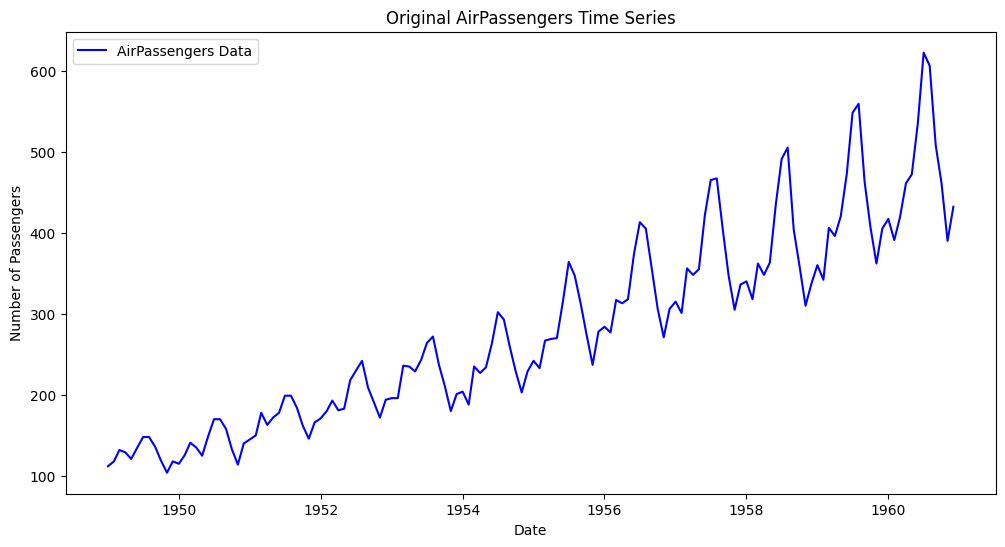

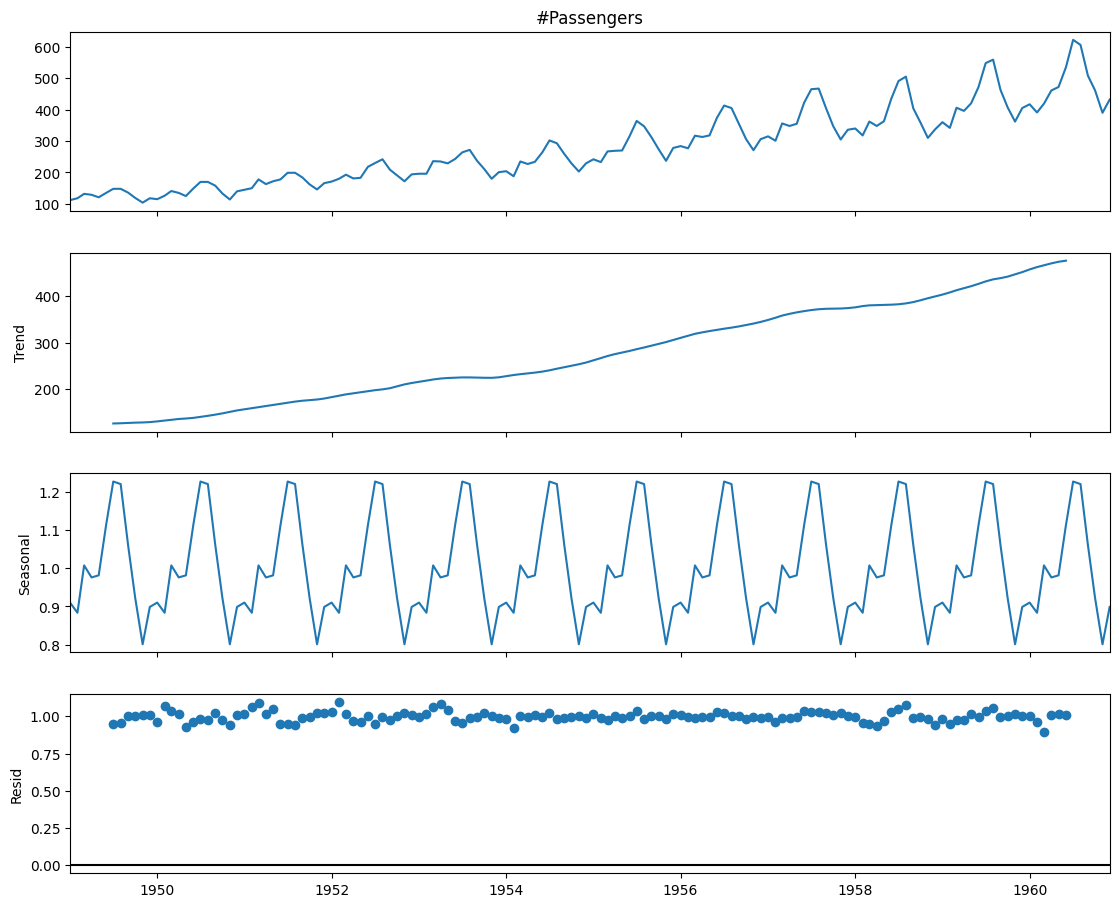

In [1]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
# and decompose it into trend, seasonality, and residual components.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = "/AirPassengers.csv"
df = pd.read_csv(file_path)

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df['#Passengers'], label="AirPassengers Data", color="blue")
plt.title("Original AirPassengers Time Series")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


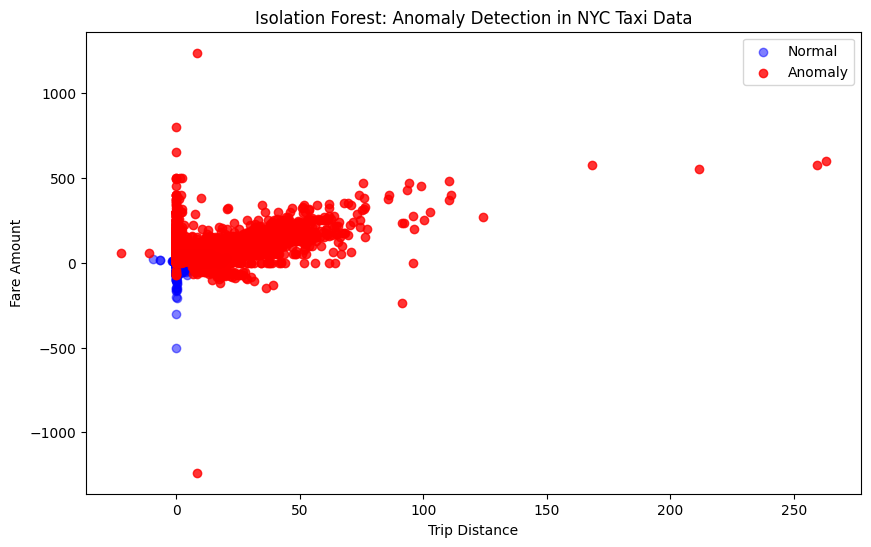

In [2]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

from sklearn.ensemble import IsolationForest

file_path = "/NYC_taxi_fare_data.csv"
df = pd.read_csv(file_path)

num_features = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
data = df[num_features]

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(data)

anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

plt.figure(figsize=(10,6))
plt.scatter(normal['trip_distance'], normal['fare_amount'], c='blue', label='Normal', alpha=0.5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], c='red', label='Anomaly', alpha=0.8)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Isolation Forest: Anomaly Detection in NYC Taxi Data')
plt.legend()
plt.show()

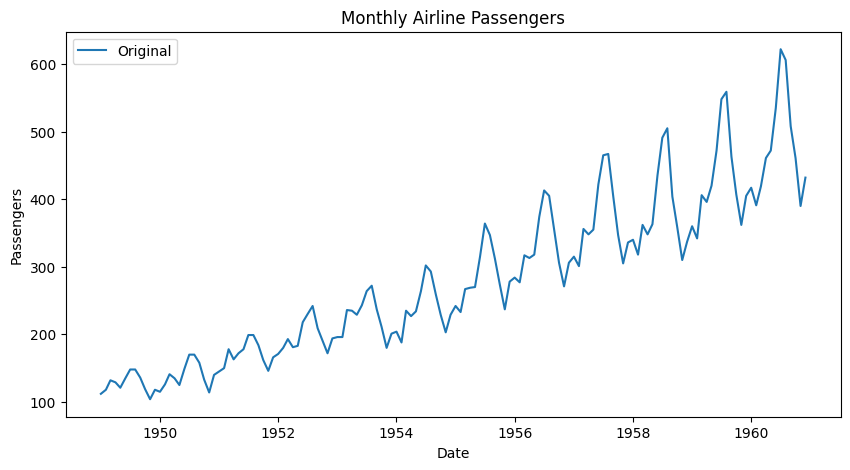

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


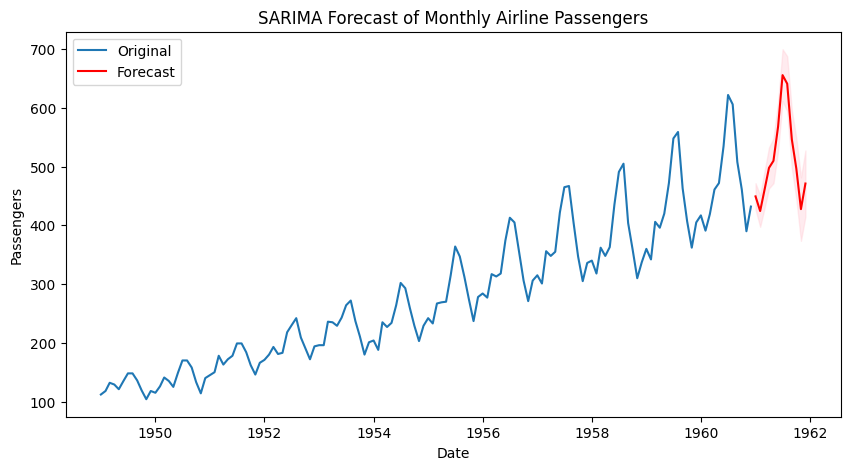

In [8]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path = "/AirPassengers.csv"
df = pd.read_csv(file_path)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Original')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

model = SARIMAX(df['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = model.fit(disp=False)

forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Original')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci['lower Passengers'], forecast_ci['upper Passengers'],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


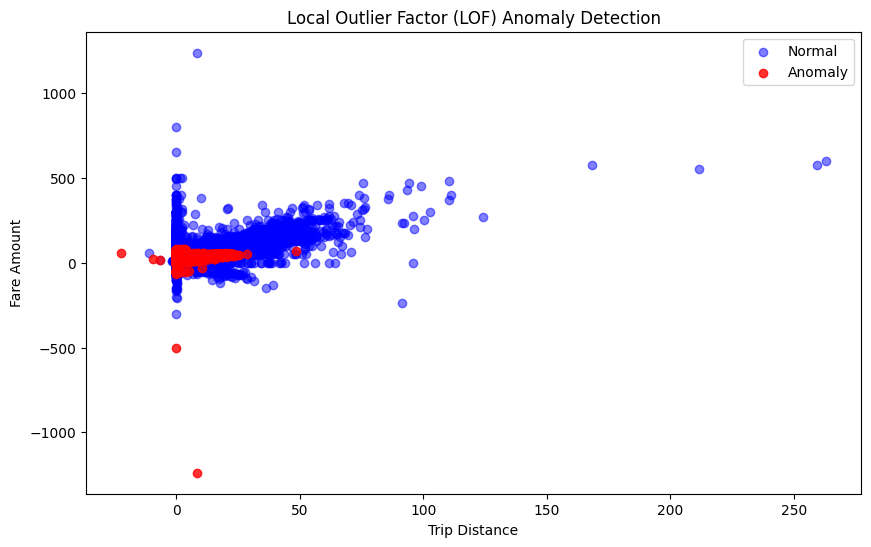

In [10]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

file_path = "/NYC_taxi_fare_data.csv"
df = pd.read_csv(file_path)

num_features = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
data = df[num_features]

data = data.fillna(0)
data = data.replace([float('inf'), -float('inf')], 0)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['LOF_anomaly'] = lof.fit_predict(data)

anomalies = df[df['LOF_anomaly'] == -1]
normal = df[df['LOF_anomaly'] == 1]

plt.figure(figsize=(10,6))
plt.scatter(normal['trip_distance'], normal['fare_amount'], c='blue', label='Normal', alpha=0.5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], c='red', label='Anomaly', alpha=0.8)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.legend()
plt.show()

10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

    -> In this scenario, the task involves both real-time anomaly detection and short-term demand forecasting to ensure reliable power grid operations. A well-structured workflow would include the following steps:

    Anomaly Detection:
    For detecting abnormal spikes or drops in real-time consumption data, Isolation Forest would be the most practical choice. It is efficient for high-dimensional data and works well with continuous streaming. Unlike DBSCAN or LOF, Isolation Forest scales better for large, fast-arriving data, making it suitable for real-time monitoring of energy usage. For added robustness, anomalies could also be cross-validated with contextual features like weather and region.

    Short-Term Forecasting:
    For forecasting energy demand at 15-minute intervals, SARIMAX would be ideal. Unlike ARIMA and SARIMA, SARIMAX allows incorporating exogenous variables such as weather conditions and regional data, which are critical drivers of energy consumption. This ensures the forecasts are not only trend- and seasonality-aware but also responsive to external factors.

    Validation and Monitoring:
    The model’s accuracy would be validated using rolling forecasting origin (walk-forward validation), where forecasts are continuously compared against actual values. Metrics like RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) would track prediction quality. For anomaly detection, precision-recall or F1-score can measure how well unusual events are caught. Continuous monitoring pipelines would be set up to retrain models periodically as patterns evolve over time.

    Business Impact:
    This solution would provide direct value to grid operations. Real-time anomaly detection helps in quickly identifying equipment failures, theft, or unusual demand surges before they escalate into outages. Accurate demand forecasts assist in resource allocation, load balancing, and energy purchasing decisions, reducing operational costs and ensuring stable supply. Overall, this workflow supports both operational reliability and cost efficiency for the power grid company.